In [3]:
import os
import torch
import numpy as np
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
import pickle

In [4]:
LATENTSPACE_UNPERTURBED = "../data/taccruns/predictions-latentspacesave1-unperturbed/"#"../data/taccruns/predictions-latentspace-unperturbed/"
DOE_7bcz_A = "../data/taccruns/predictions-latentspacesave-DOEstrucmodu_7bcz_A/" #

In [54]:
#lst_iterations = [f"r{r}i{i}" for r in range(4) for i in range(8)]
lst_iterations = [f"i{i}" for r in range(4) for i in range(8)]
lst_iterations[0] = "r0 i0"
lst_iterations[8] = "r1 i0"
lst_iterations[16] = "r2 i0"
lst_iterations[24] = "r3 i0"
#lst_iterations = ['evo'] + lst_iterations

cos = nn.CosineSimilarity(dim=0)
def latent_space_cosine_grid(protein, rep):
    data = np.empty([32,32]) 
    for r1 in range(4):
        for i1 in range(8):
            for r2 in range(4):
                for i2 in range(8):
                    file_1 = LATENTSPACE_UNPERTURBED + protein + '_lspace' + '/' + rep + '_iter_' + str(i1) + '_recy_' + str(r1) + '_.pt'
                    file_2 = LATENTSPACE_UNPERTURBED + protein + '_lspace' + '/' + rep + '_iter_' + str(i2) + '_recy_' + str(r2) + '_.pt'
                    t1 = torch.flatten(torch.load(file_1, map_location=torch.device('cpu')))
                    t2 = torch.flatten(torch.load(file_2, map_location=torch.device('cpu')))
                    data[(r1*8)+i1, (r2*8)+i2] = cos(t1,t2)
    ax = sns.heatmap(data, xticklabels = lst_iterations, yticklabels = lst_iterations, annot=False)
    ax.invert_yaxis()
    ax.set_title(protein + f' | latent space: {rep} | unperturbed\n' + 'recycle (r) structure module iteration (i)' )
    plt.show()
def latent_space_cosine_grid_evo3(protein):
    lst_iterations_evo = np.insert(lst_iterations,24,'s_evo')
    rep = 's'
    file = LATENTSPACE_UNPERTURBED + protein + '_lspace' + '/' + 'evoformer_output_dict.dict'
    s_evo_r3 = torch.flatten(torch.load(file, map_location=torch.device('cpu'))["single"])
    data = np.empty([32,32]) 
    for r1 in range(4):
        for i1 in range(8):
            for r2 in range(4):
                for i2 in range(8):
                    file_1 = LATENTSPACE_UNPERTURBED + protein + '_lspace' + '/' + rep + '_iter_' + str(i1) + '_recy_' + str(r1) + '_.pt'
                    file_2 = LATENTSPACE_UNPERTURBED + protein + '_lspace' + '/' + rep + '_iter_' + str(i2) + '_recy_' + str(r2) + '_.pt'
                    t1 = torch.flatten(torch.load(file_1, map_location=torch.device('cpu')))
                    t2 = torch.flatten(torch.load(file_2, map_location=torch.device('cpu')))
                    data[(r1*8)+i1, (r2*8)+i2] = cos(t1,t2)
    # insert evo run
    d_s_evo_r3 = np.empty(32)
    for r in range(4):
        for i in range(8):
            file = LATENTSPACE_UNPERTURBED + protein + '_lspace' + '/' + rep + '_iter_' + str(i) + '_recy_' + str(r) + '_.pt'
            t = torch.flatten(torch.load(file, map_location=torch.device('cpu')))
            d_s_evo_r3[(r*8)+i] = cos(s_evo_r3,t)

    data = np.insert(data, 24, d_s_evo_r3, axis = 1) # insert evo data along one axis (len 32)
    d_s_evo_r3 = np.insert(d_s_evo_r3,24,cos(s_evo_r3,s_evo_r3)) # expand evo data with cosine of itself (now len 33)
    data = np.insert(data, 24, d_s_evo_r3, axis = 0) # insert along new axis
    ax = sns.heatmap(data, xticklabels = lst_iterations_evo, yticklabels = lst_iterations_evo, annot=False)
    ax.invert_yaxis()
    ax.set_title(protein + f' | latent space: {rep} | unperturbed\n' + 'recycle (r) structure module iteration (i)' )
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.show()


def latent_space_cosine_grid_DOE(protein,rep,i_zeroed,r_zeroed):
    data = np.empty([32,32]) 
    for r1 in range(4):
        for i1 in range(8):
            for r2 in range(4):
                for i2 in range(8):
                    file_1 = DOE_7bcz_A + protein + f'_lspace_zeroedat_r_{i_zeroed}_i_{r_zeroed}/' + rep + '_iter_' + str(i1) + '_recy_' + str(r1) + '_.pt'
                    file_2 = DOE_7bcz_A + protein + f'_lspace_zeroedat_r_{i_zeroed}_i_{r_zeroed}/' + rep + '_iter_' + str(i2) + '_recy_' + str(r2) + '_.pt'
                    t1 = torch.flatten(torch.load(file_1, map_location=torch.device('cpu')))
                    t2 = torch.flatten(torch.load(file_2, map_location=torch.device('cpu')))
                    data[(r1*8)+i1, (r2*8)+i2] = cos(t1,t2)
    ax = sns.heatmap(data, xticklabels = lst_iterations, yticklabels = lst_iterations, annot=False)
    ax.invert_yaxis()
    ax.set_title(protein + f' | latent space: {rep} | purturbed at i {i_zeroed} r {r_zeroed}\n' + 'recycle (r) structure module iteration (i)' )
    plt.show()
def latent_space_cosine_grid_DOE_with_evo_s(protein,i_zeroed,r_zeroed):
    rep = 's' # required
    lst_iterations_evo = np.insert(lst_iterations,24,'s_evo')
    lst_iterations_evo = np.insert(lst_iterations_evo,16,'s_evo')
    lst_iterations_evo = np.insert(lst_iterations_evo,8,'s_evo')
    lst_iterations_evo = np.insert(lst_iterations_evo,0,'s_evo')
    data = np.zeros([36,36]) 
    for r1 in range(4):
        for i1 in range(9):
            for r2 in range(4):
                for i2 in range(9):
                    if i1 == 0: 
                        file_1 = DOE_7bcz_A + protein + f'_lspace_zeroedat_r_{i_zeroed}_i_{r_zeroed}/' + f"s_evo_block_recy_{r1}_.pt"
                    else:
                        file_1 = DOE_7bcz_A + protein + f'_lspace_zeroedat_r_{i_zeroed}_i_{r_zeroed}/' + rep + '_iter_' + str(i1-1) + '_recy_' + str(r1) + '_.pt'
                    if i2 == 0: 
                        file_2 = DOE_7bcz_A + protein + f'_lspace_zeroedat_r_{i_zeroed}_i_{r_zeroed}/' + f"s_evo_block_recy_{r2}_.pt"
                    else:
                        file_2 = DOE_7bcz_A + protein + f'_lspace_zeroedat_r_{i_zeroed}_i_{r_zeroed}/' + rep + '_iter_' + str(i2-1) + '_recy_' + str(r2) + '_.pt'

                    t1 = torch.flatten(torch.load(file_1, map_location=torch.device('cpu')))
                    t2 = torch.flatten(torch.load(file_2, map_location=torch.device('cpu')))
                    data[(r1*9)+i1, (r2*9)+i2] = cos(t1,t2)
    ax = sns.heatmap(data, xticklabels = lst_iterations_evo, yticklabels = lst_iterations_evo, annot=False)
    ax.invert_yaxis()
    ax.set_title(protein + f' | latent space: {rep} | purturbed at i {i_zeroed} r {r_zeroed}\n' + 'recycle (r) structure module iteration (i)' )
    plt.show()

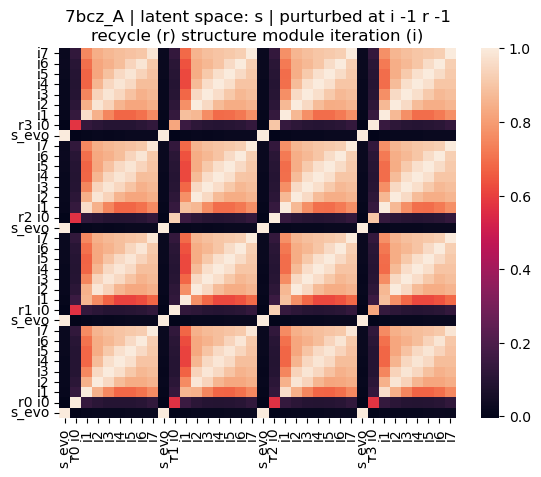

In [55]:
latent_space_cosine_grid_DOE_with_evo_s('7bcz_A',-1,-1)

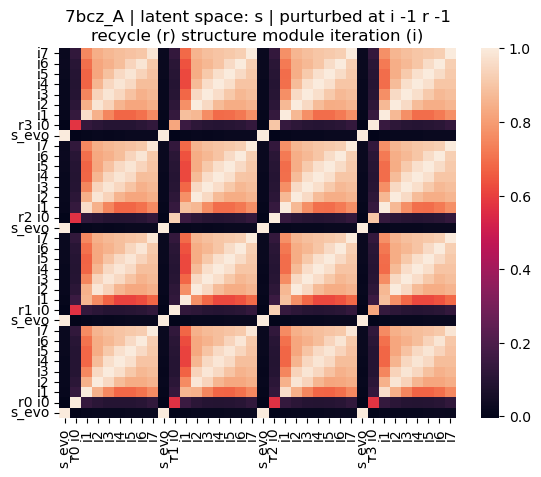

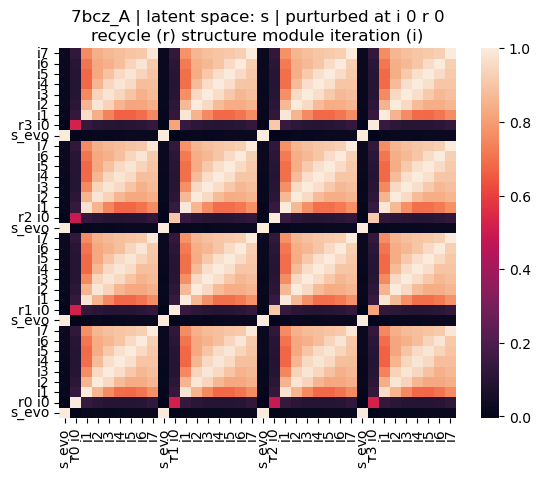

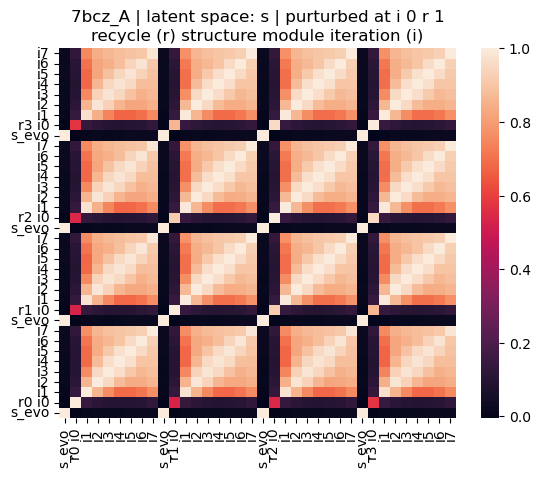

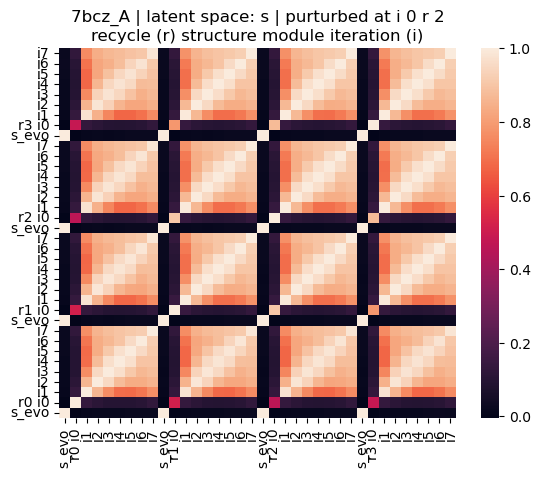

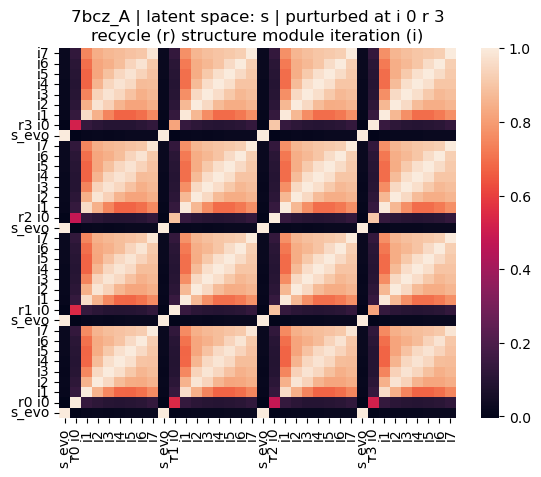

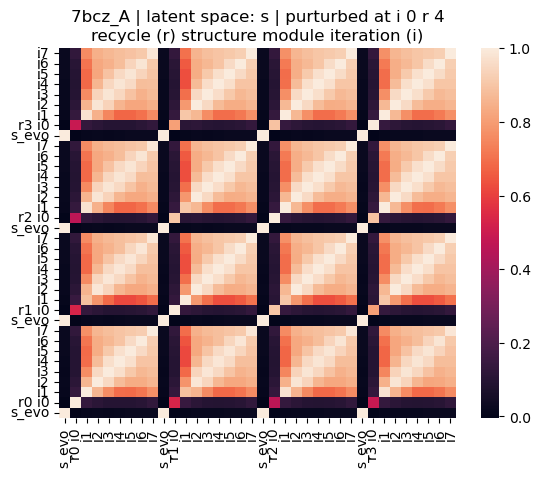

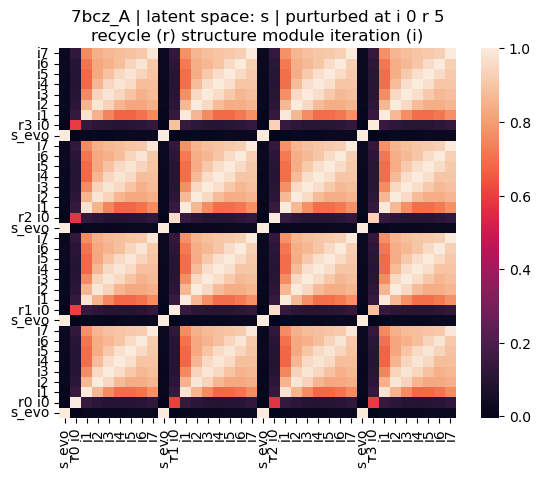

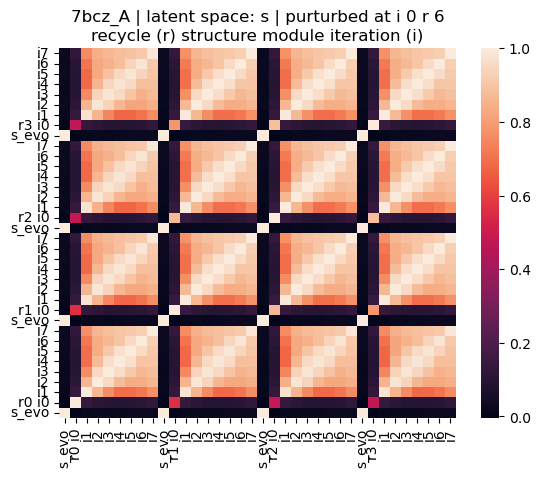

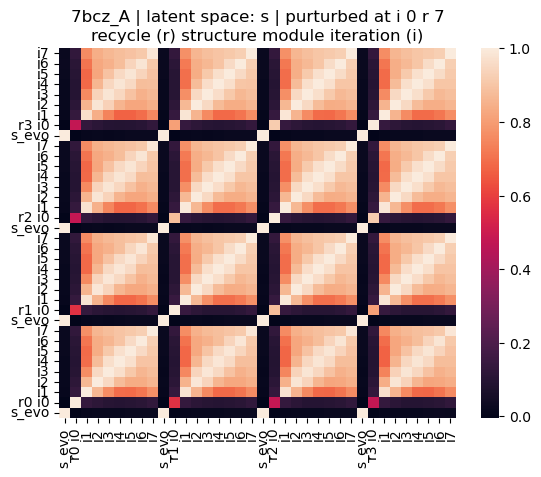

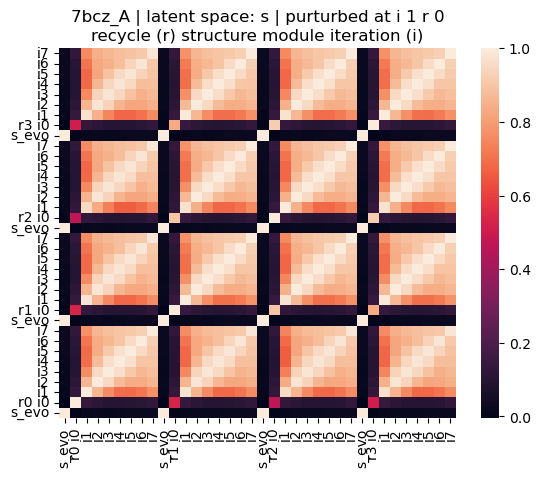

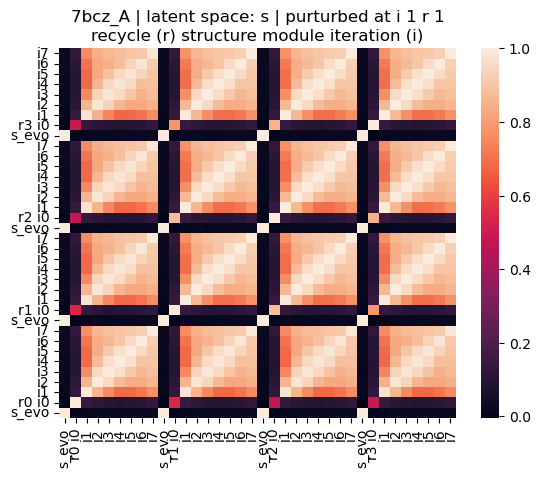

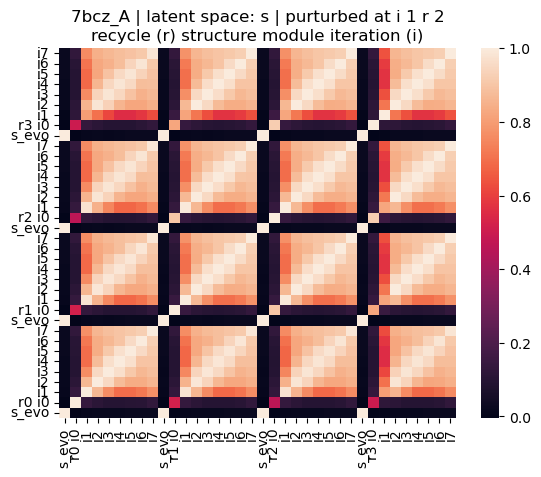

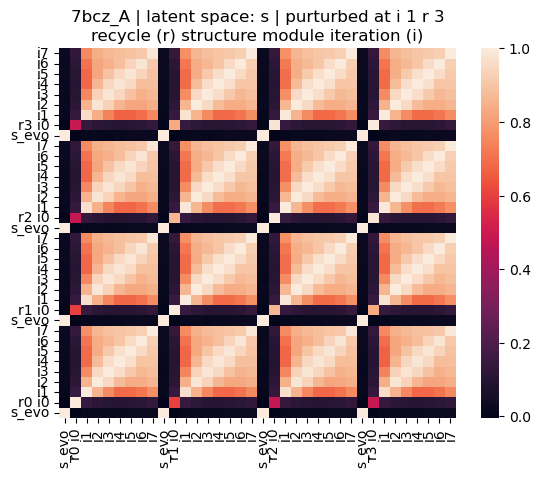

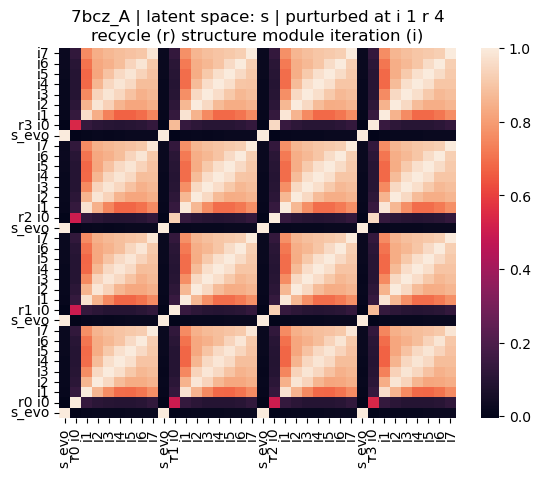

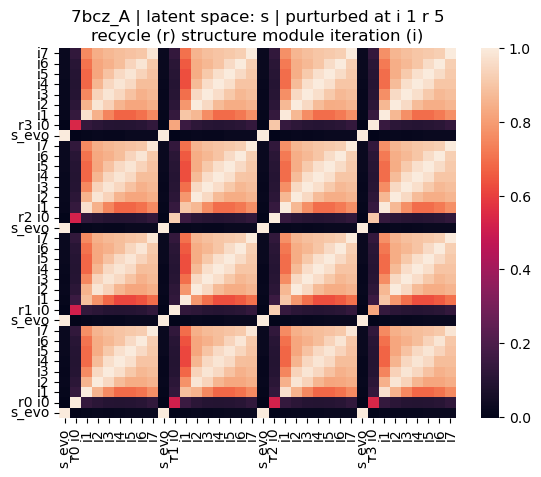

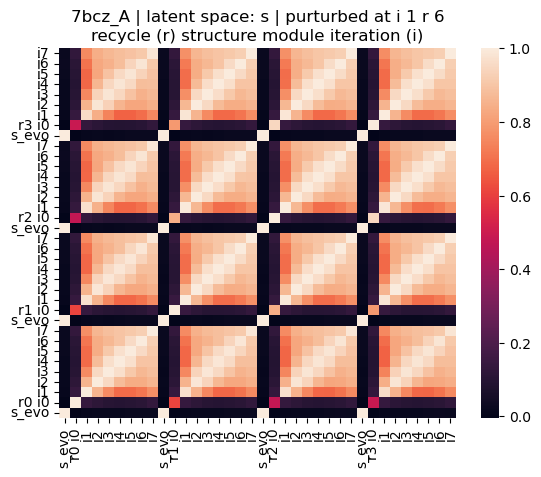

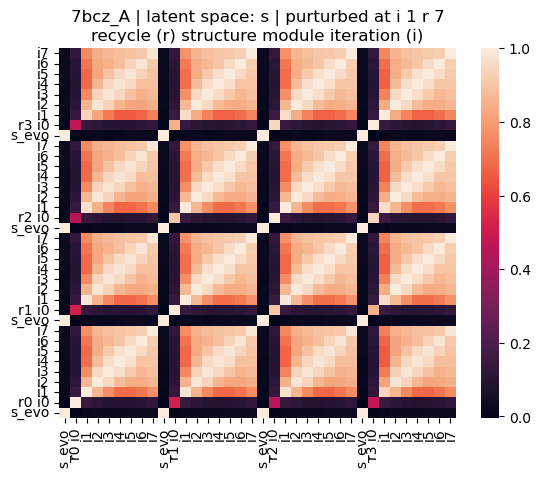

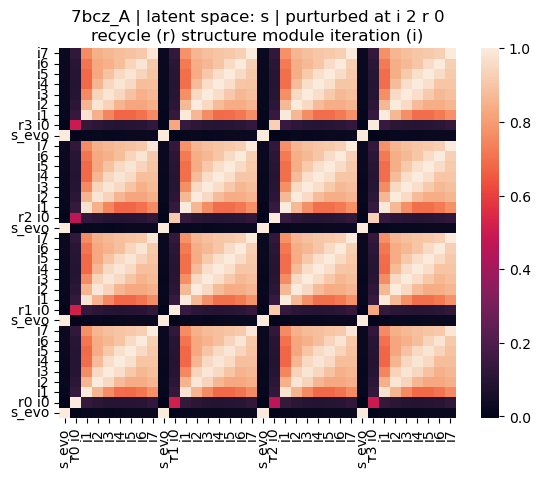

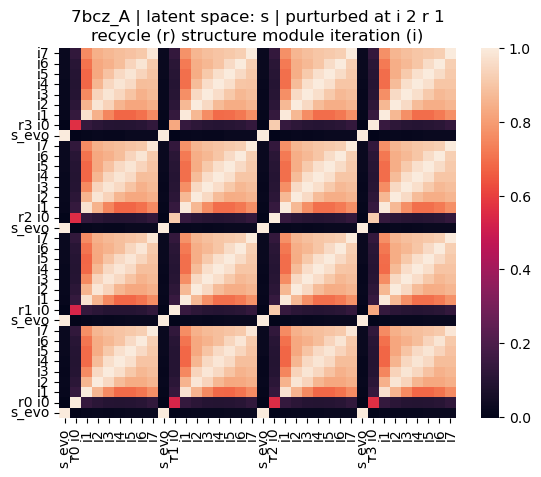

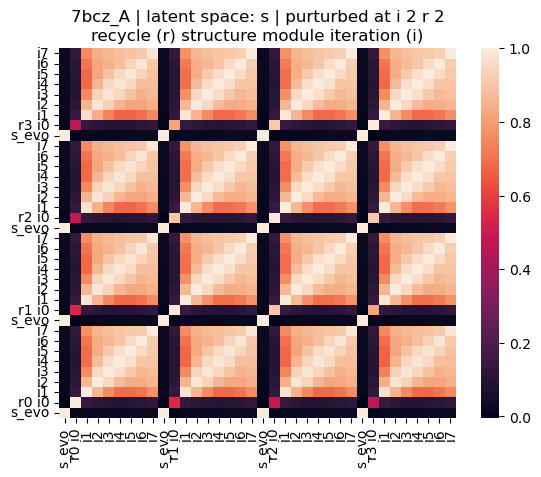

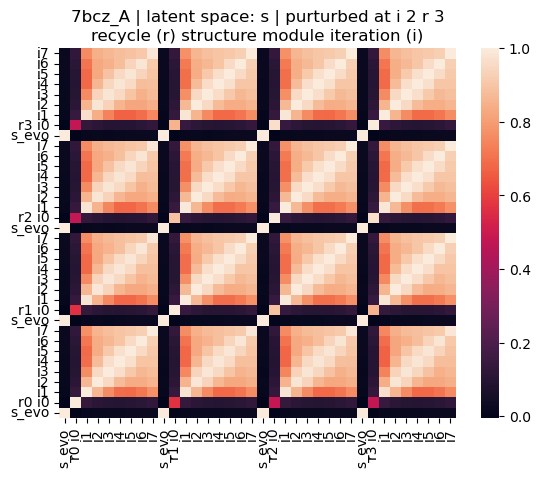

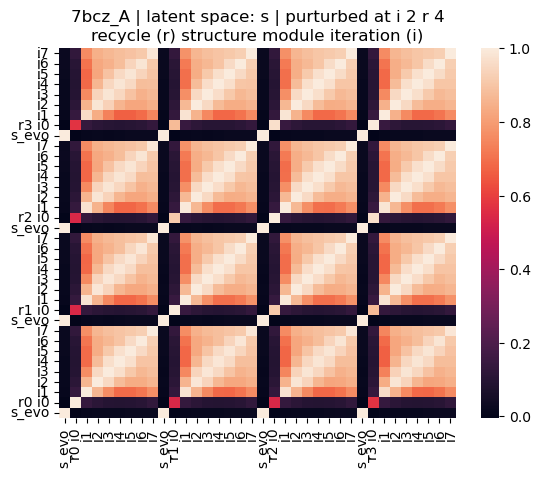

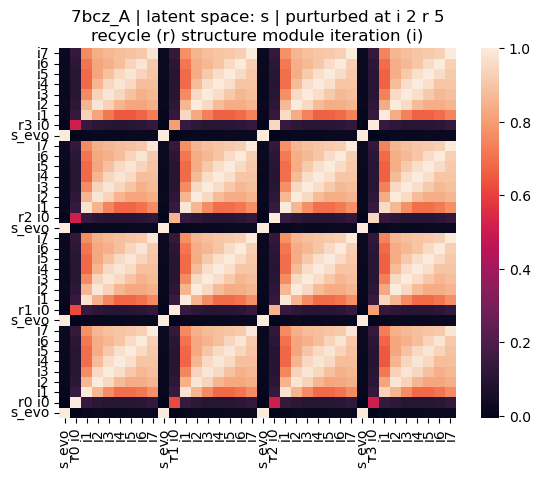

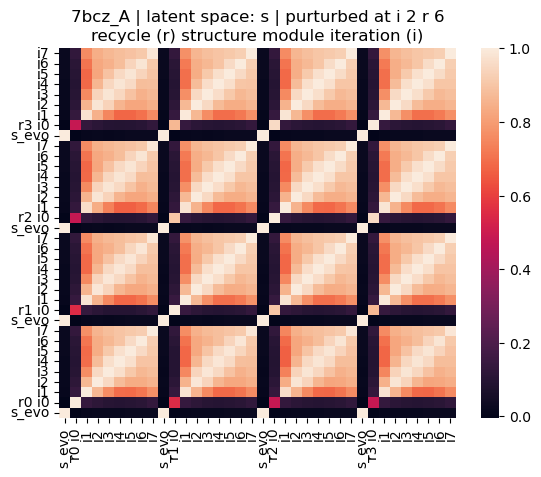

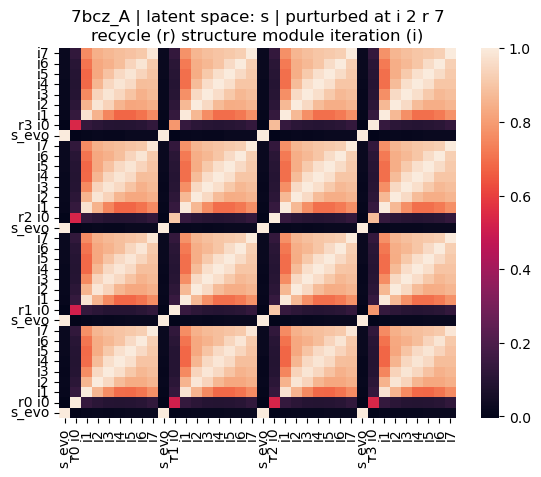

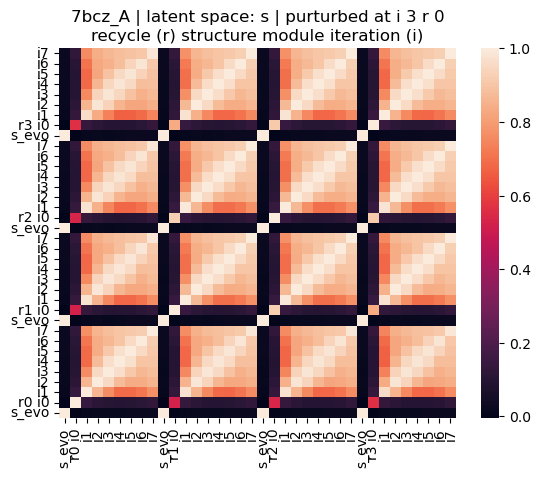

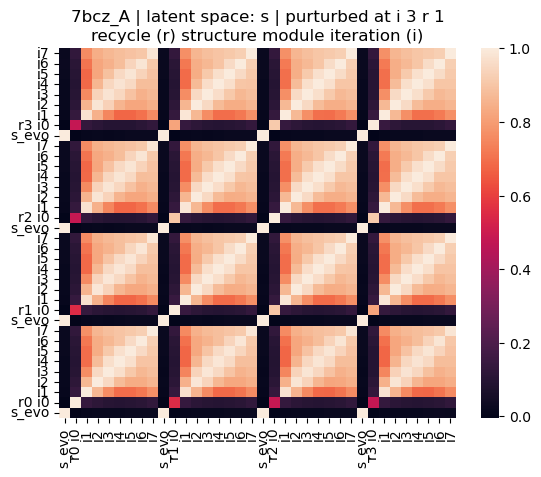

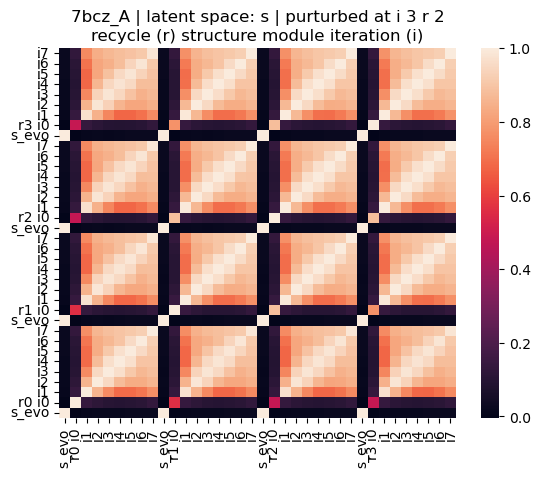

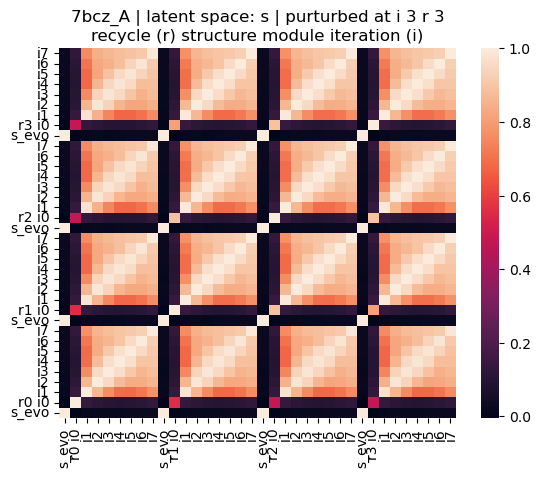

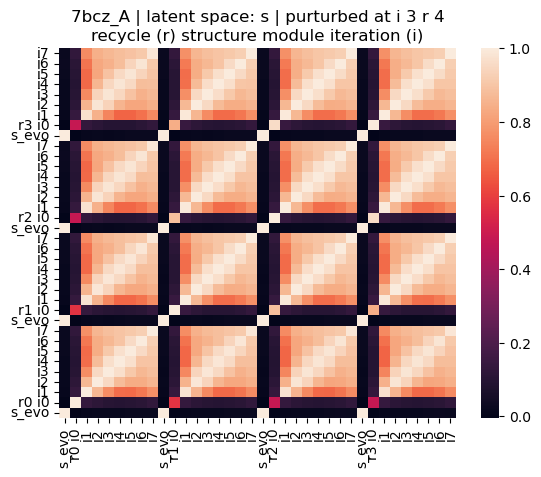

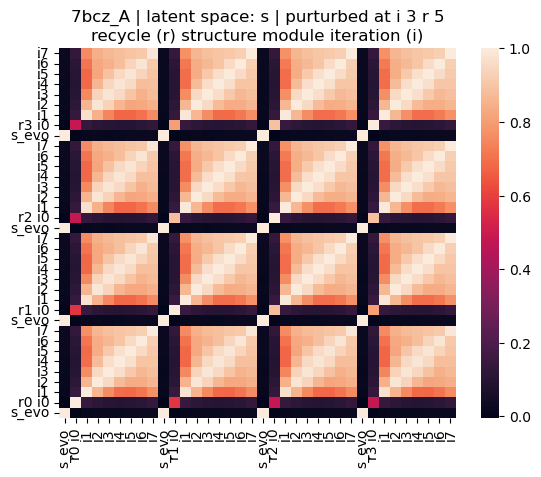

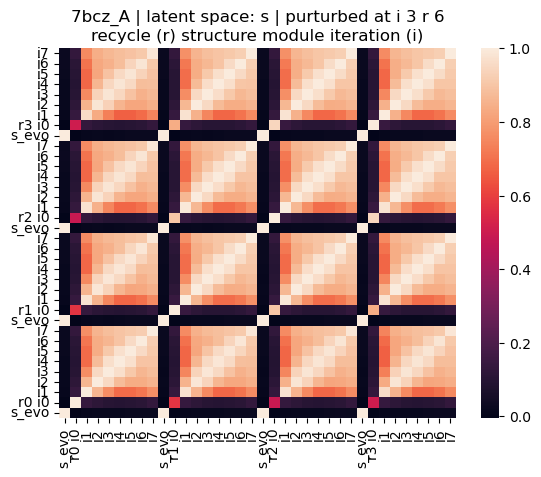

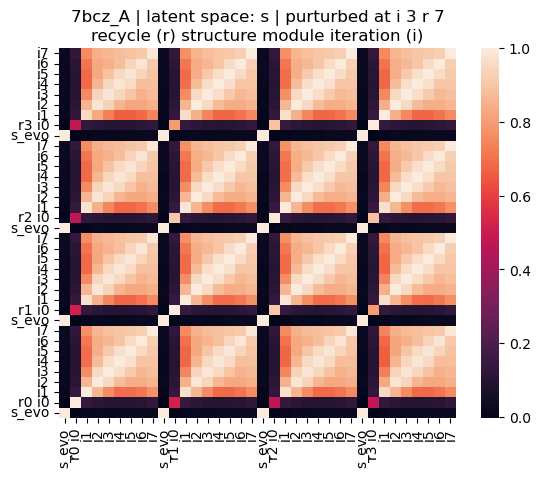

In [56]:
latent_space_cosine_grid_DOE_with_evo_s('7bcz_A',-1,-1)
for r in range(4):
    for i in range(8):
        latent_space_cosine_grid_DOE_with_evo_s('7bcz_A',r,i)

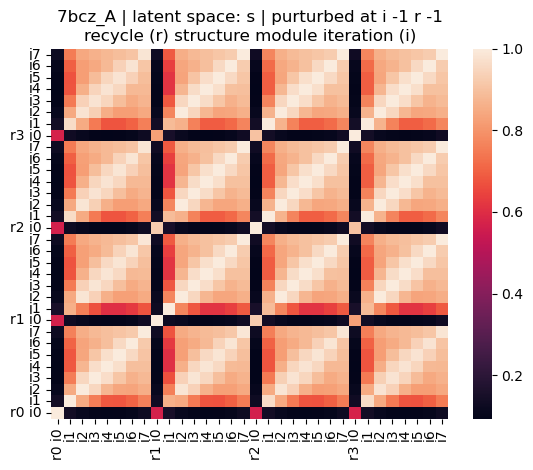

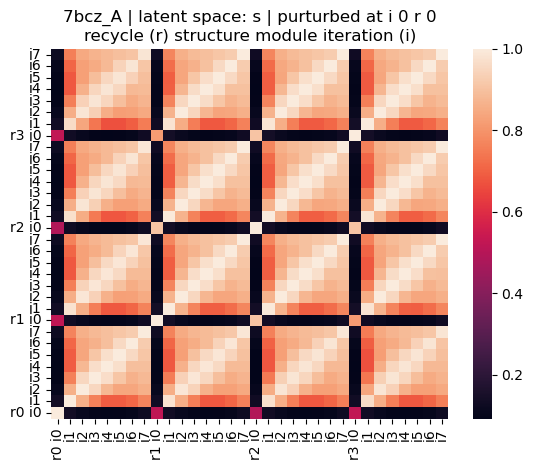

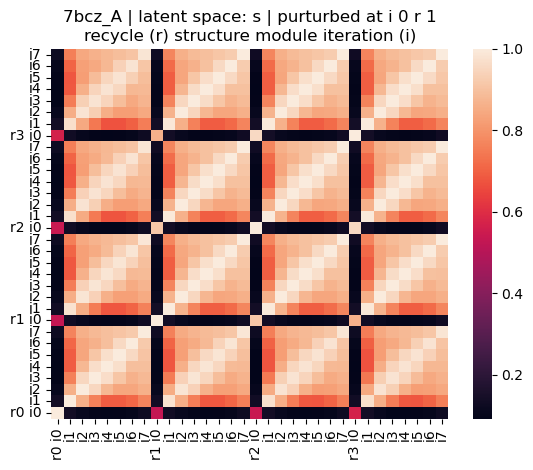

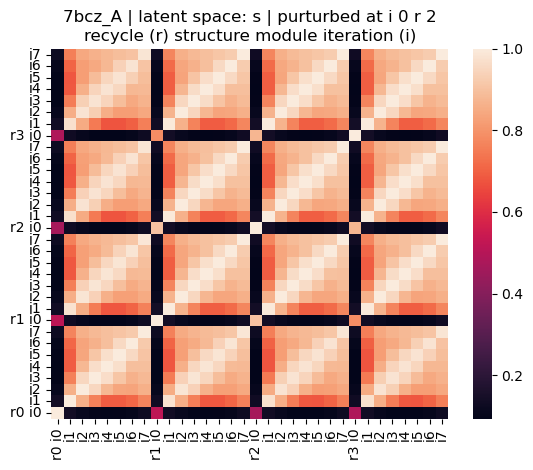

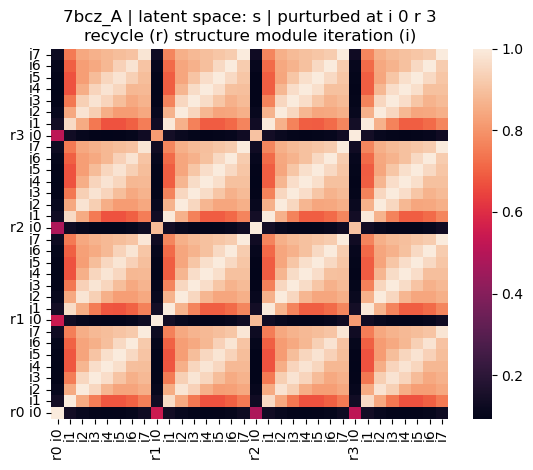

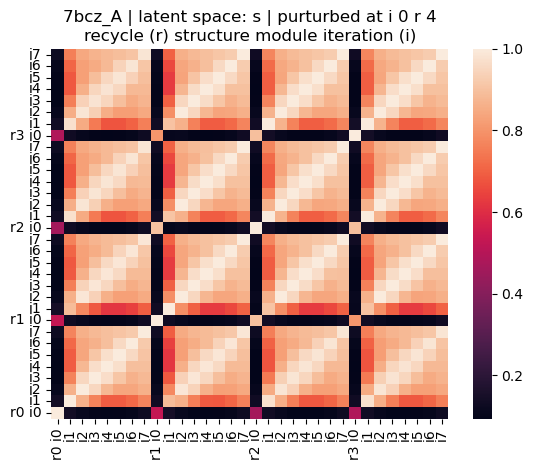

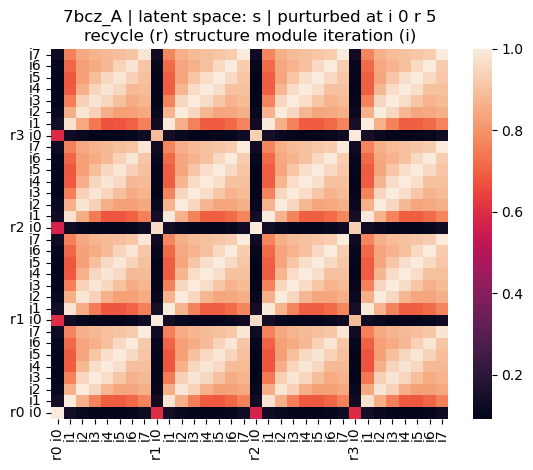

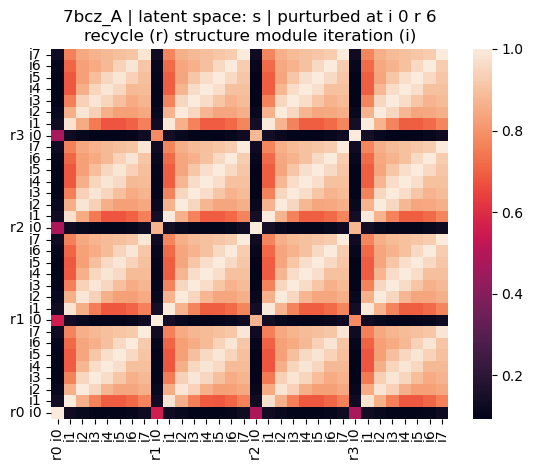

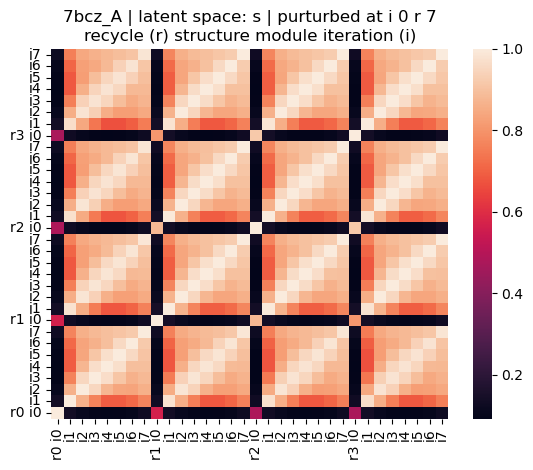

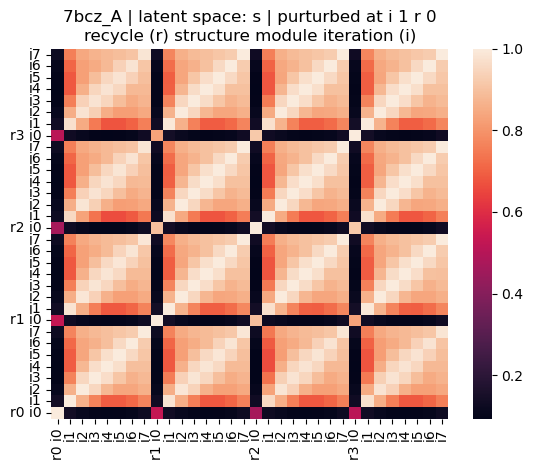

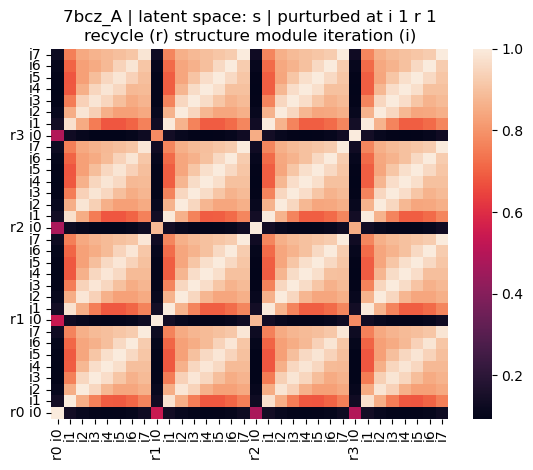

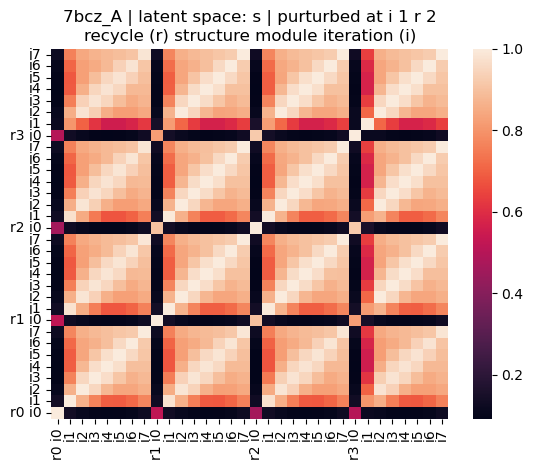

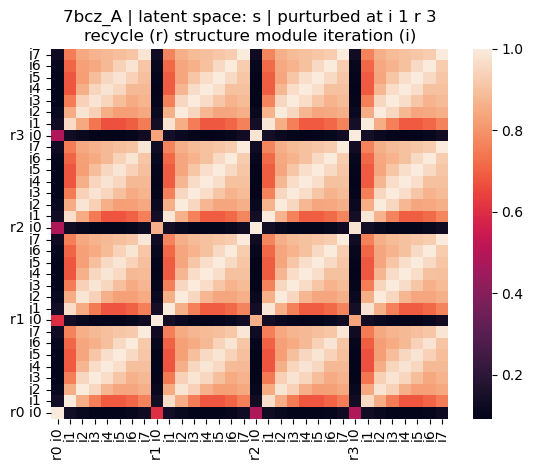

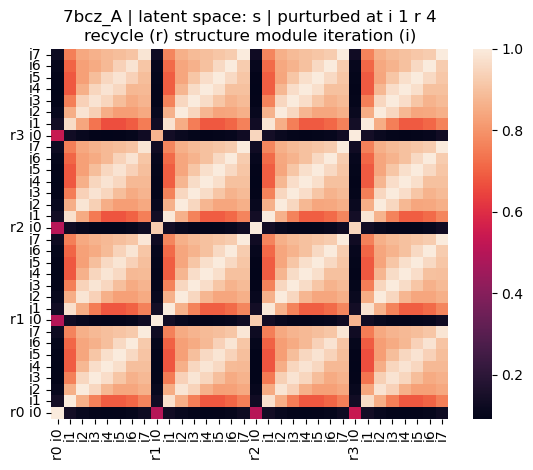

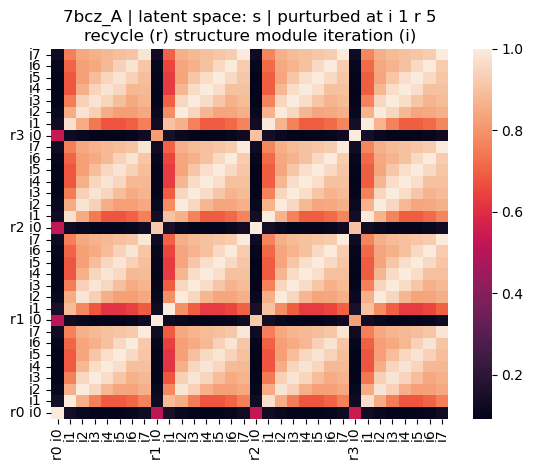

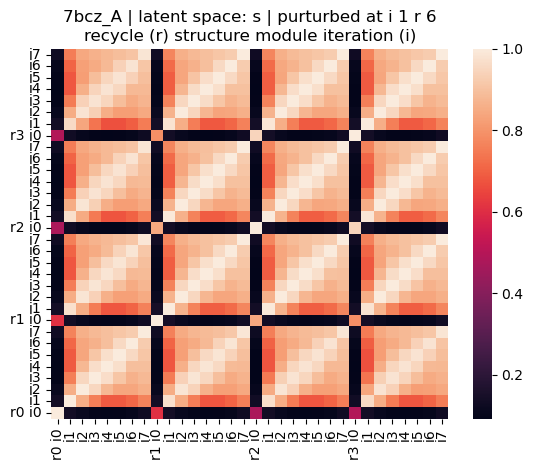

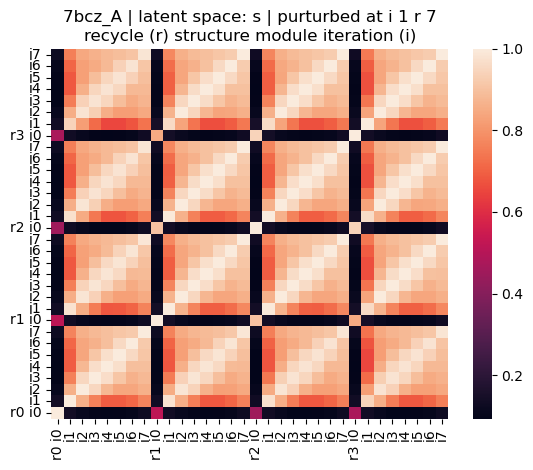

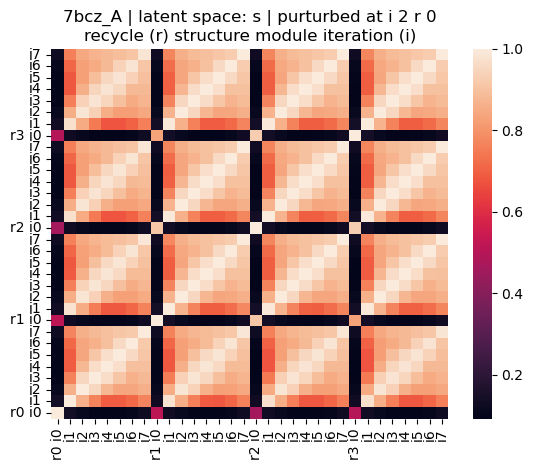

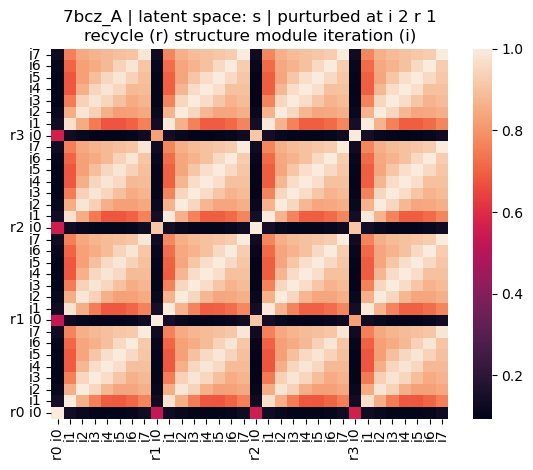

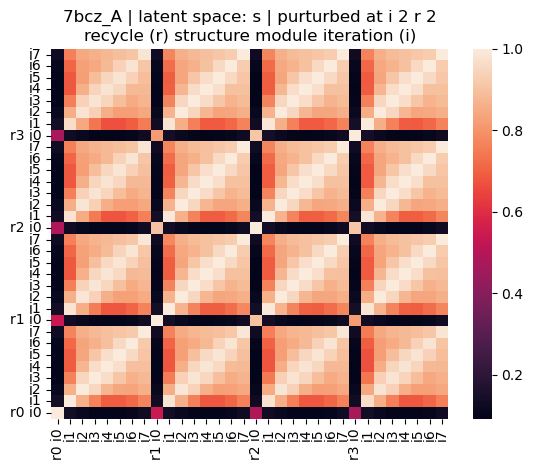

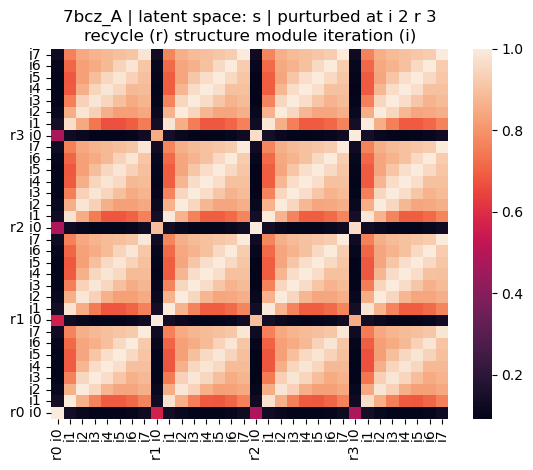

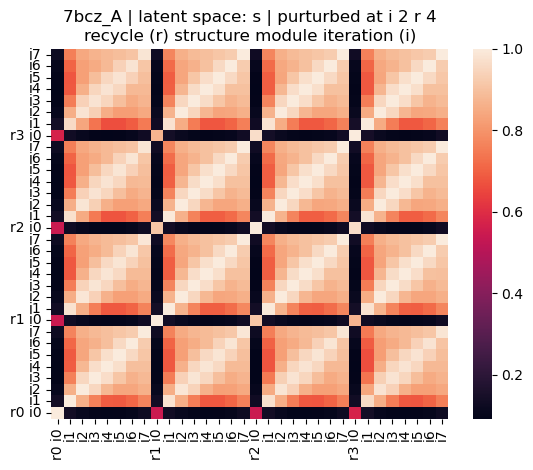

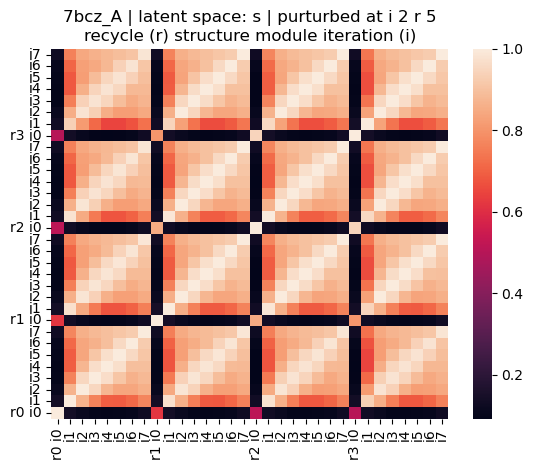

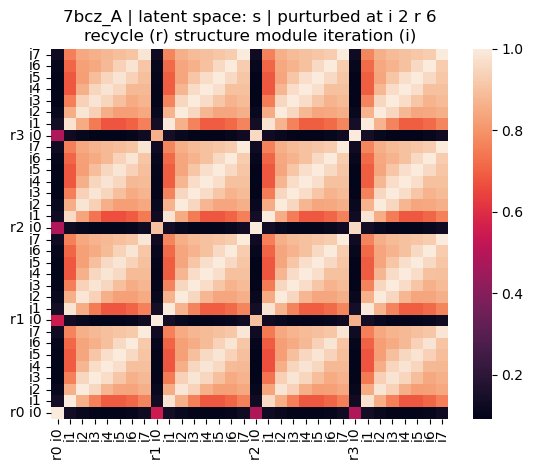

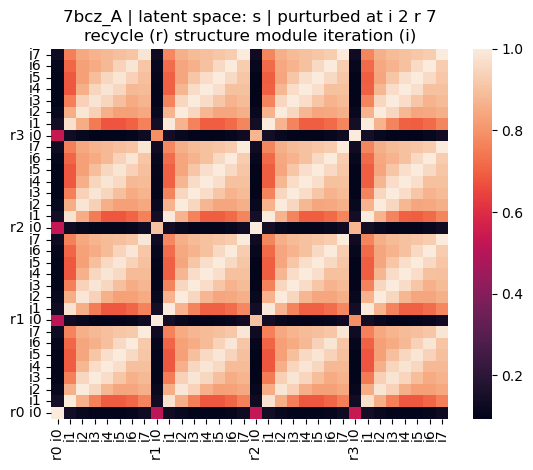

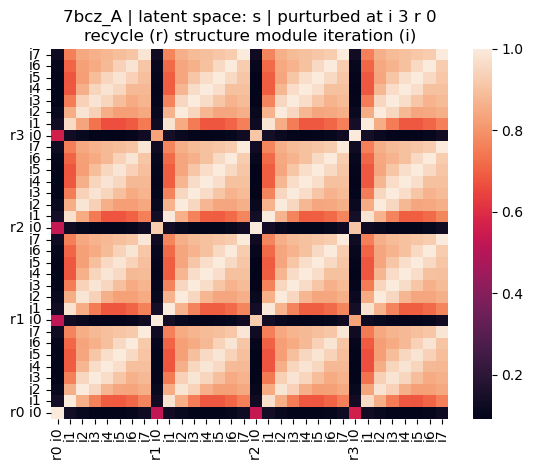

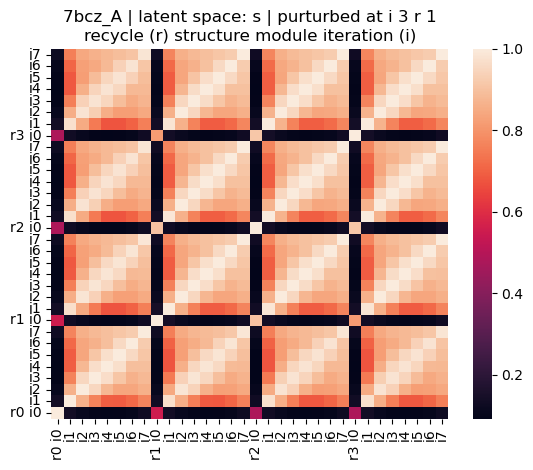

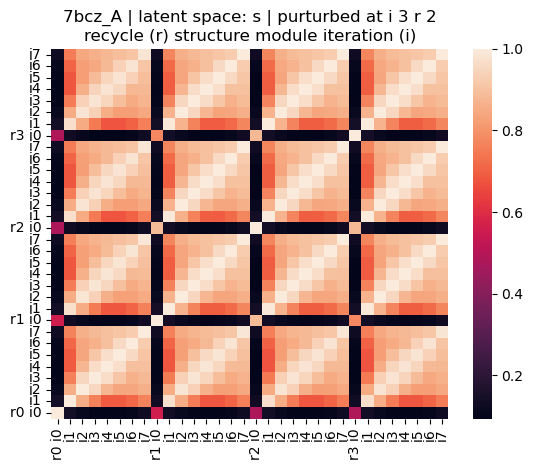

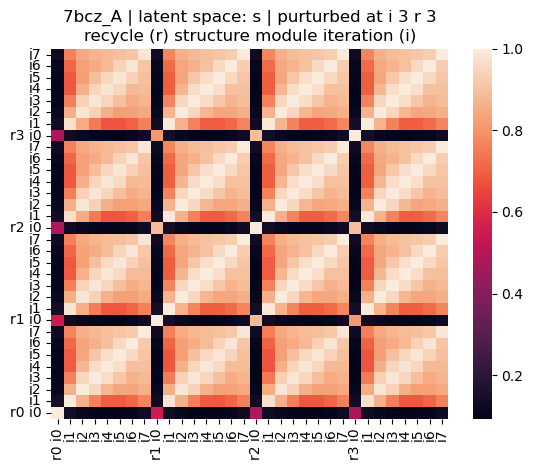

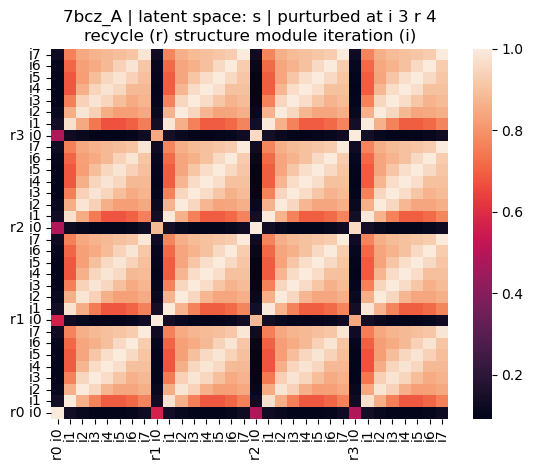

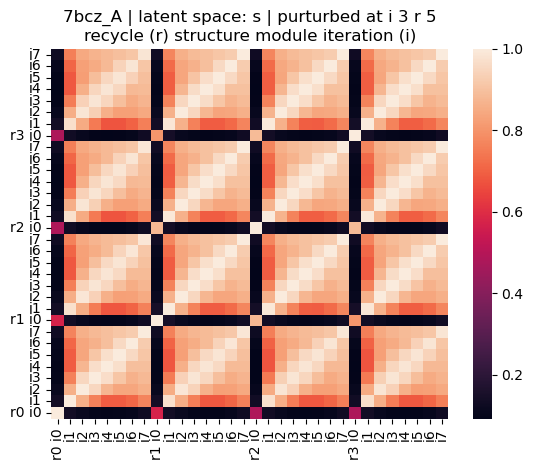

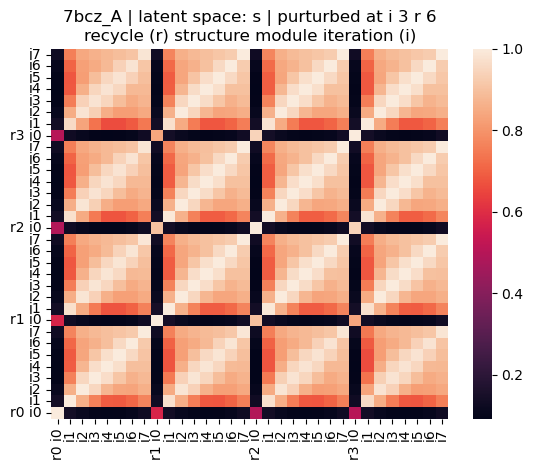

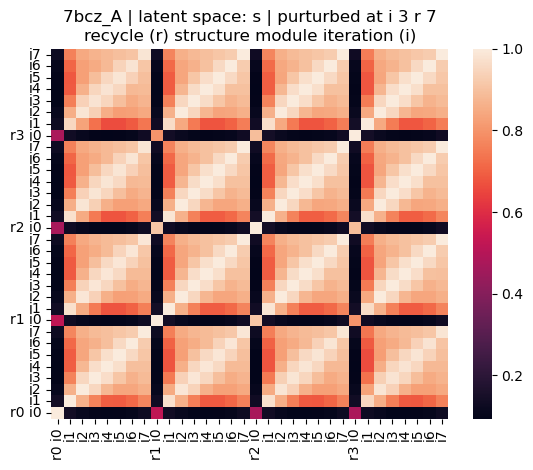

In [23]:
latent_space_cosine_grid_DOE('7bcz_A','s',-1,-1)
for r in range(4):
    for i in range(8):
        latent_space_cosine_grid_DOE('7bcz_A','s',r,i)

7tav_B


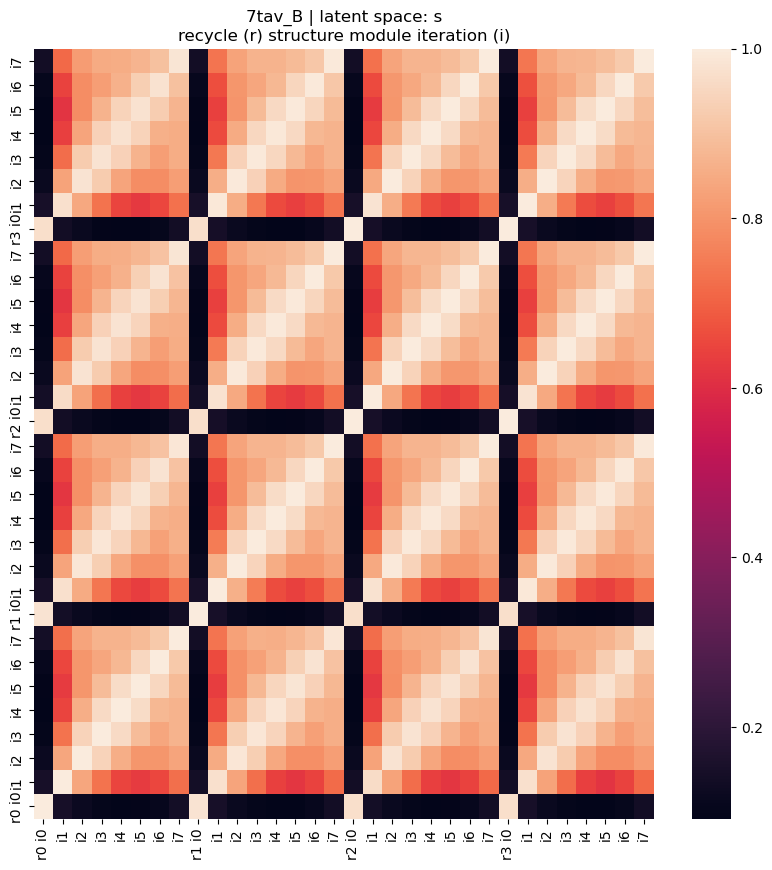

7eea_A


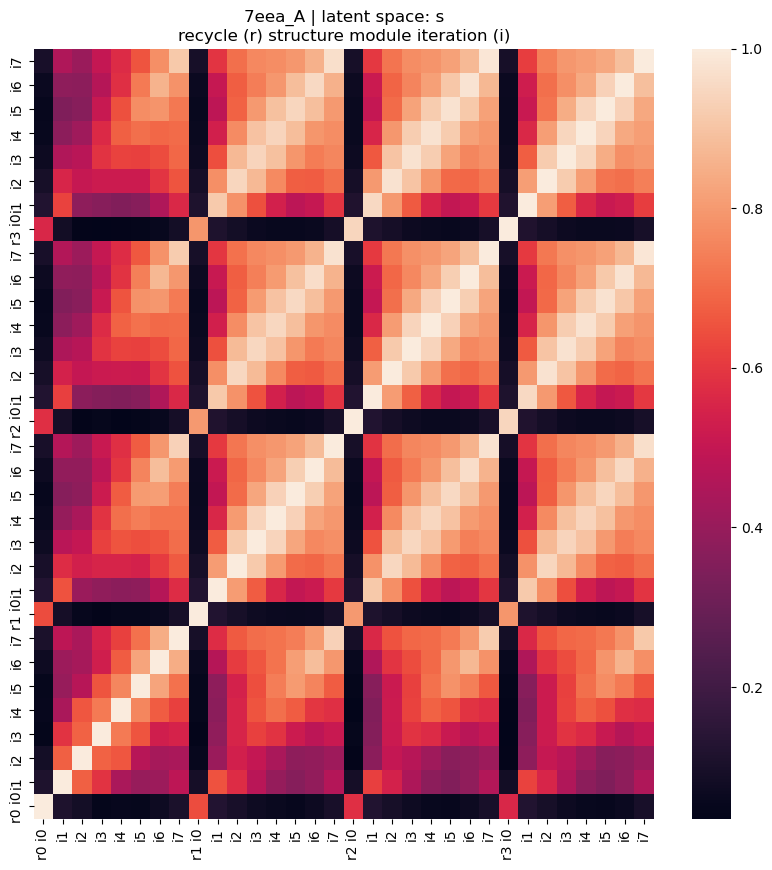

7bny_B


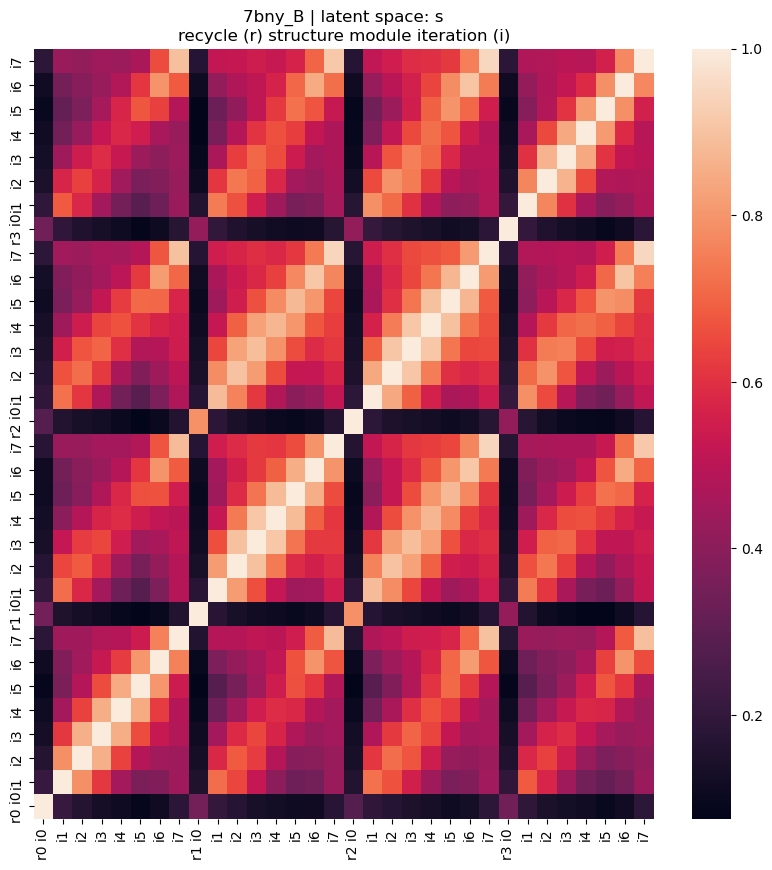

7dck_A


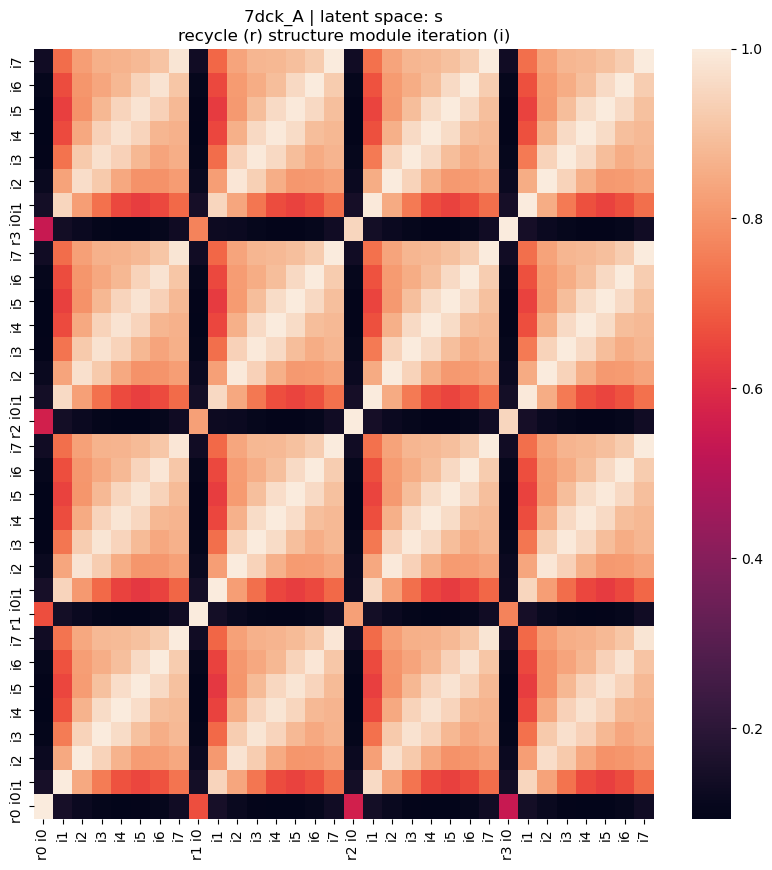

In [ ]:
# old code that didn't work. maybe useful for reference later

lst_iterations = [f"r{r}i{i}" for r in range(4) for i in range(8)]
lst_results = [np.ones(4)*i for i in range(32)]
df = pd.DataFrame({'a': lst_iterations,
                   'a_results': lst_results,
                   'b': lst_iterations,
                   'b_results': lst_results
                  })
df_pivot = df.pivot_table(values=['a_results', 'b_results'], index='a',columns='b',aggfunc=np.sum)
###
df = pd.DataFrame(columns=lst_iterations)#, index=lst_iterations)
for r in range(4):
    for i in range(8):
        df.loc[f"r{r}i{i}",f"r{r}i{i}"] = float(i+r)
df